In [11]:

from ucimlrepo import fetch_ucirepo 
import pandas as pd

mushroom = fetch_ucirepo(id=73)  
X = mushroom.data.features 
y = mushroom.data.targets 

import pandas as pd

# Creating the DataFrame with the selected columns
selected_columns = ['odor', 'gill-size','cap-color',]  
df_subset = X[selected_columns].copy()
df_subset['poisonous'] = y

# Display the first few rows
print(df_subset.head())


  odor gill-size cap-color poisonous
0    p         n         n         p
1    a         b         y         e
2    l         b         w         e
3    p         n         w         p
4    n         b         g         e


In [13]:
# Display column names for features
print(X.columns)


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [23]:
import pandas as pd
y_numeric = y.replace({'e': 0, 'p': 1}) 
X_numeric = X.copy()
for col in X_numeric.select_dtypes(include=['object']).columns:  
    X_numeric[col] = X_numeric[col].astype('category').cat.codes  

print(X_numeric.head())
print(y_numeric.head())



   cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0          5            2          4        1     6                1   
1          5            2          9        1     0                1   
2          0            2          8        1     3                1   
3          5            3          8        1     6                1   
4          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0             0          1           4            0  ...   
1             0          0           4            0  ...   
2             0          0           5            0  ...   
3             0          1           5            0  ...   
4             1          0           4            1  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                         2                       7                       7   
1                         2                     

C:\Users\Chris\AppData\Local\Temp\ipykernel_16564\1178785478.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_numeric = y.replace({'e': 0, 'p': 1})  # 'e' -> 0 (edible), 'p' -> 1 (poisonous)


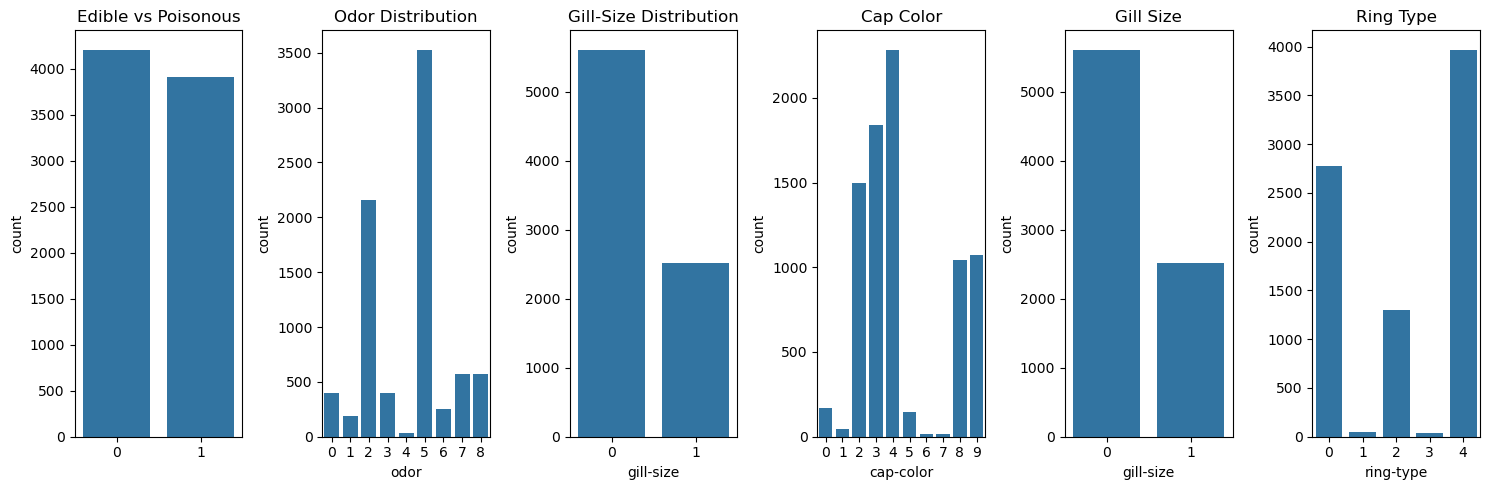

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert y_numeric to a one-dimensional array
y_numeric_flat = y_numeric.values.ravel()  # Flattens it to 1D

# Plot distributions for categorical columns
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Poisonous distribution
sns.countplot(x=y_numeric_flat, ax=axes[0])
axes[0].set_title("Edible vs Poisonous")

# Odor distribution
sns.countplot(x=X_numeric['odor'], ax=axes[1])
axes[1].set_title("Odor Distribution")

# Gill-size distribution
sns.countplot(x=X_numeric['gill-size'], ax=axes[2])
axes[2].set_title("Gill-Size Distribution")

sns.countplot(x=X_numeric['cap-color'], ax=axes[3])
axes[3].set_title("Cap Color")

sns.countplot(x=X_numeric['gill-size'], ax=axes[4])
axes[4].set_title("Gill Size")

sns.countplot(x=X_numeric['ring-type'], ax=axes[5])
axes[5].set_title("Ring Type")

plt.tight_layout()
plt.show()


<Axes: xlabel='odor', ylabel='poisonous'>

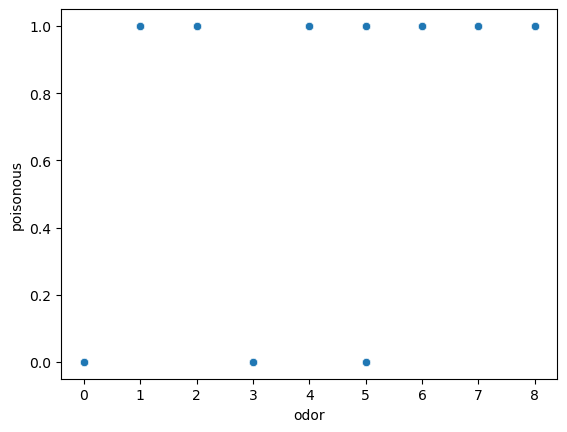

In [65]:


sns.scatterplot(x=X_numeric['odor'], y=y_numeric_flat)



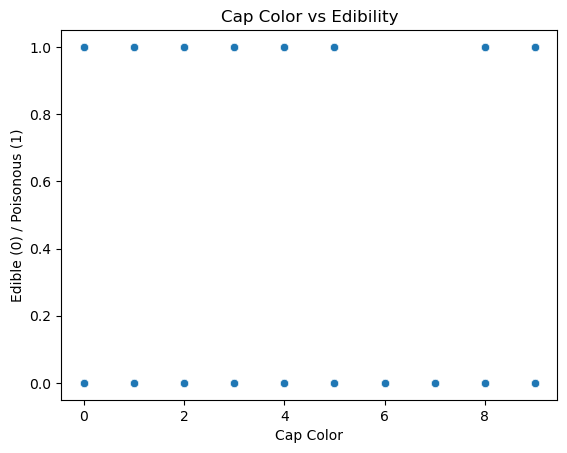

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_numeric['cap-color'], y=y_numeric_flat)
plt.title("Cap Color vs Edibility")
plt.xlabel("Cap Color")
plt.ylabel("Edible (0) / Poisonous (1)")
plt.show()


Based on the scatter plots, odor appears to be a strong predictor of whether a mushroom is poisonous. The distribution suggests a clear relationship between certain odors and edibility.